In [62]:
import keras

from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K


import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [63]:
batch_size = 64     

num_classes = 10

epochs = 7          

# input image dimensions:

img_rows, img_cols = 28, 28

###  Loading the CIFAR10 dataset 
####   (CIFAR = Canadian Institute for Advanced Research)

In [64]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


###  Checking shapes of data

In [65]:
x_train.shape

(60000, 28, 28)

In [66]:
y_train.shape

(60000,)

In [67]:
x_test.shape

(10000, 28, 28)

In [68]:
y_test.shape
y1 = y_test

###  A function to display images inrows and columns


In [69]:
def display_image(data, nrows, ncols, index):
    plt.subplot(nrows, ncols, index)    
    plt.imshow(data, cmap='plasma')

###  Displaying 10 sample images from the above dataset, in a single row

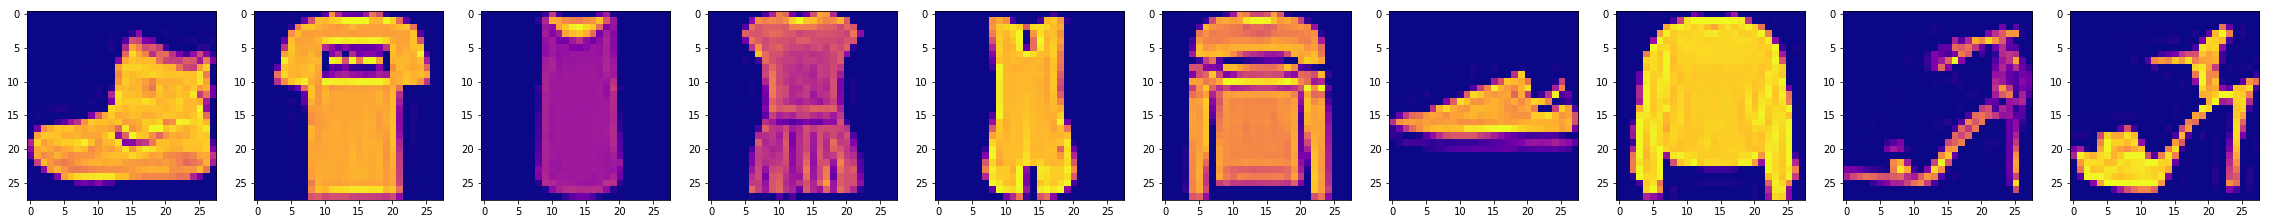

In [70]:
ncols = 10
plt.figure(figsize=(40,40))

for i in range(ncols):
    display_image(x_train[i], 1, ncols, i+1)            

###  The 10 possible classes are as follows.

In [71]:
labels = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', \
           5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag' , 9: 'Ankle boot'}

In [72]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [73]:
input_shape

(28, 28, 1)

### To normalize pixel values to be in [0.0, 1.0]

In [74]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [75]:
# x_train

### class numbers to one-hot encoding

In [76]:

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

## feed-forward deep learning model

In [77]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation='relu'))  #fully-connected layer 1

model.add(Dropout(0.25))

model.add(Dense(10, activation='relu'))  #fully-connected layer 1

#model.add(Dropout(0.25))

model.add(Dense(10, activation='relu'))  #fully-connected layer 2

model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax')) # OUTPUT

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 16)          0         
__________

### loss function, optimizer and metrics

In [79]:
#SGD optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.20, momentum=0.01, decay=0.005),    
              metrics=['accuracy'])

## training

In [80]:
%%time

training=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 43s 711us/step - loss: 1.5880 - acc: 0.3535 - val_loss: 1.1572 - val_acc: 0.5440
Epoch 2/7
60000/60000 [==============================] - 41s 688us/step - loss: 1.3317 - acc: 0.4604 - val_loss: 1.0507 - val_acc: 0.6097
Epoch 3/7
60000/60000 [==============================] - 41s 682us/step - loss: 1.2580 - acc: 0.4970 - val_loss: 1.0029 - val_acc: 0.6234
Epoch 4/7
60000/60000 [==============================] - 41s 680us/step - loss: 1.2178 - acc: 0.5157 - val_loss: 0.9754 - val_acc: 0.6278
Epoch 5/7
60000/60000 [==============================] - 41s 685us/step - loss: 1.1869 - acc: 0.5345 - val_loss: 0.9452 - val_acc: 0.6528
Epoch 6/7
60000/60000 [==============================] - 41s 686us/step - loss: 1.1597 - acc: 0.5439 - val_loss: 0.9326 - val_acc: 0.6523
Epoch 7/7
60000/60000 [==============================] - 42s 697us/step - loss: 1.1410 - acc: 0.5547 - val_loss: 0.9118 - 

In [81]:
x_test.shape

(10000, 28, 28, 1)

In [82]:
y_test.shape

(10000, 10)

In [83]:
# x_test[0:2, : , : , : ]

In [84]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 235us/step
Test loss: 0.9118457761764527
Test accuracy: 0.6669


In [24]:

batch_size = 64     

num_classes = 10

epochs = 7          
img_rows, img_cols = 36, 28

In [25]:
model_train = pd.read_csv("train1.csv")

In [26]:
model_train.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,995,996,997,998,999,1000,1001,1002,1003,1004
0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
1,1,0,0,0,0,0,1,0,0,0,...,129,129,129,129,129,129,129,129,129,129
2,2,0,0,0,0,0,0,0,0,0,...,259,259,259,259,259,259,259,259,259,259
3,3,0,0,0,0,0,0,0,0,33,...,181,181,181,181,181,181,181,181,181,181
4,4,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103


In [27]:
model_train = model_train.drop('Unnamed: 0',axis=1)

In [28]:
model_test = pd.read_csv("test1.csv")
model_test = model_test.drop('Unnamed: 0',axis=1)

In [29]:
model_train = model_train.values

In [30]:
model_train.shape

(60000, 1008)

In [31]:
model_test.shape

(10000, 1008)

In [32]:
model_train1 = model_train.reshape(60000,36,28)

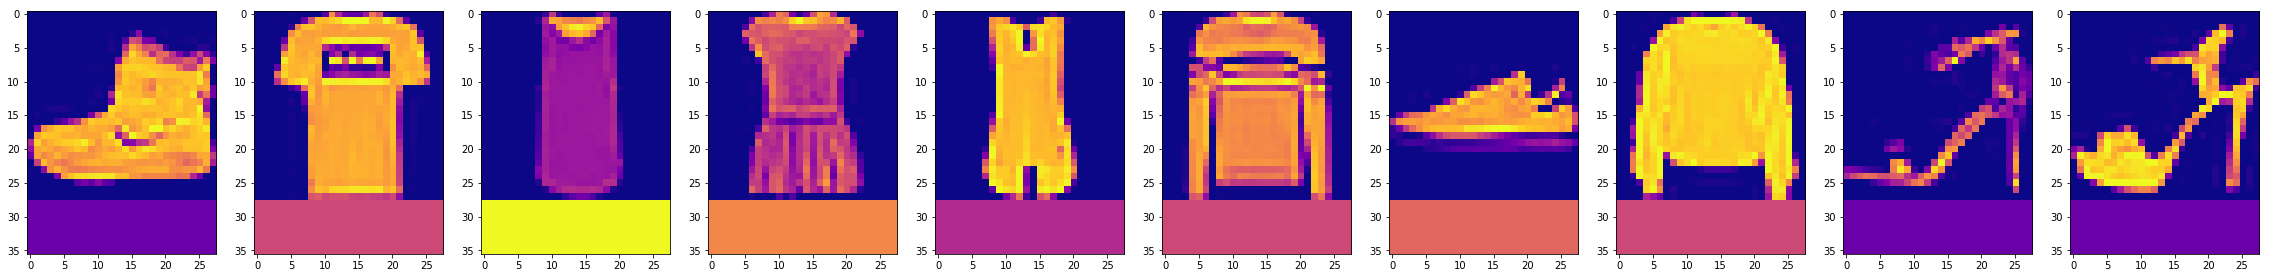

In [33]:
def display_image(data, nrows, ncols, index):
    plt.subplot(nrows, ncols, index)    
    plt.imshow(data, cmap='plasma')
ncols = 10
plt.figure(figsize=(40,40))
for i in range(ncols):
    display_image(model_train1[i], 1, ncols, i+1)          

In [34]:
model_test = model_test.values

In [35]:
x_train=model_train
x_test=model_test

In [36]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [37]:
input_shape

(36, 28, 1)

In [38]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [39]:
#y_train = keras.utils.to_categorical(y_train, num_classes)

#y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
model1 = Sequential()

model1.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model1.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))

model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Conv2D(16, (3, 3), activation='relu'))


model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(10, activation='relu'))  #fully-connected layer 1

model1.add(Dropout(0.25))

model1.add(Dense(10, activation='relu'))  #fully-connected layer 1

#model.add(Dropout(0.25))

model1.add(Dense(10, activation='relu'))  #fully-connected layer 2

model1.add(Dropout(0.25))

model1.add(Dense(num_classes, activation='softmax')) # OUTPUT

In [41]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 34, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 5, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 5, 16)          0         
__________

In [42]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.20, momentum=0.01, decay=0.005),    
              metrics=['accuracy'])

In [43]:
%%time

training_clustering=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 59s 978us/step - loss: 1.5305 - acc: 0.3779 - val_loss: 1.0848 - val_acc: 0.5830
Epoch 2/7
60000/60000 [==============================] - 57s 949us/step - loss: 1.3199 - acc: 0.4537 - val_loss: 0.9798 - val_acc: 0.6471
Epoch 3/7
60000/60000 [==============================] - 57s 956us/step - loss: 1.2548 - acc: 0.4774 - val_loss: 0.9192 - val_acc: 0.6549
Epoch 4/7
60000/60000 [==============================] - 57s 953us/step - loss: 1.2216 - acc: 0.4934 - val_loss: 0.8675 - val_acc: 0.7029
Epoch 5/7
60000/60000 [==============================] - 57s 951us/step - loss: 1.1941 - acc: 0.5089 - val_loss: 0.8398 - val_acc: 0.7172
Epoch 6/7
60000/60000 [==============================] - 58s 960us/step - loss: 1.1744 - acc: 0.5177 - val_loss: 0.8363 - val_acc: 0.7222
Epoch 7/7
60000/60000 [==============================] - 57s 953us/step - loss: 1.1627 - acc: 0.5259 - val_loss: 0.8144 - 

In [44]:
score = model1.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 280us/step
Test loss: 0.814364638710022
Test accuracy: 0.7264


In [45]:
batch_size = 64     

num_classes = 10

epochs = 7          
img_rows, img_cols = 32, 28

In [46]:
model_train1 = pd.read_csv("train2.csv")

In [47]:
model_train1 = model_train1.drop('Unnamed: 0',axis=1)

In [48]:
model_test1 = pd.read_csv("test2.csv")
model_test1 = model_test1.drop('Unnamed: 0',axis=1)

In [49]:
model_train1 = model_train1.values

In [50]:
model_train2 = model_train1.reshape(60000,32,28)

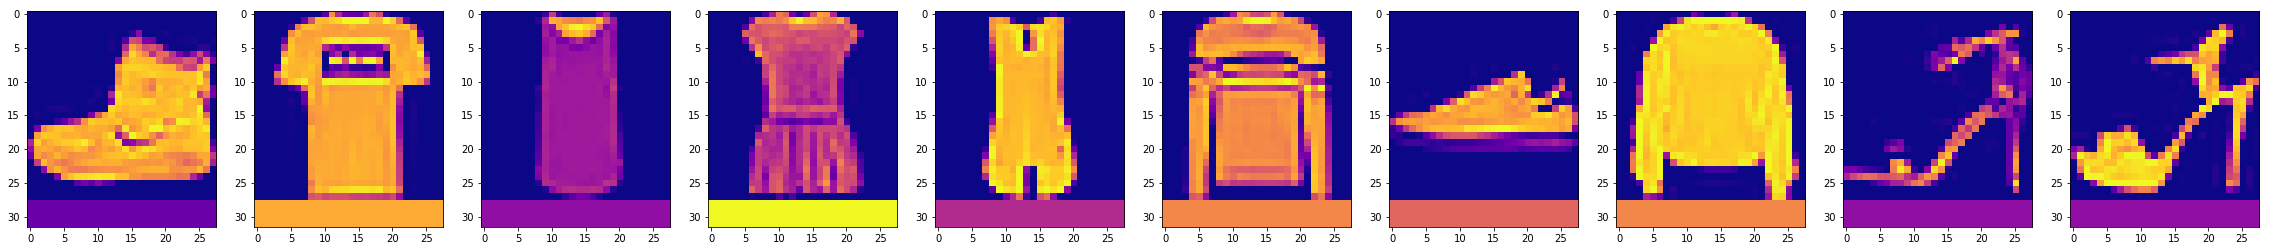

In [51]:
def display_image(data, nrows, ncols, index):
    plt.subplot(nrows, ncols, index)    
    plt.imshow(data, cmap='plasma')
ncols = 10
plt.figure(figsize=(40,40))
for i in range(ncols):
    display_image(model_train2[i], 1, ncols, i+1)          

In [52]:
model_test1 = model_test1.values

In [53]:
x_train=model_train1
x_test=model_test1

In [54]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [55]:
input_shape

(32, 28, 1)

In [56]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [57]:
model2 = Sequential()

model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model2.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.25))

model2.add(Conv2D(16, (3, 3), activation='relu'))


model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(10, activation='relu'))  #fully-connected layer 1

model2.add(Dropout(0.25))

model2.add(Dense(10, activation='relu'))  #fully-connected layer 1

#model.add(Dropout(0.25))

model2.add(Dense(10, activation='relu'))  #fully-connected layer 2

model2.add(Dropout(0.25))

model2.add(Dense(num_classes, activation='softmax')) # OUTPUT

In [58]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 26, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 5, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 5, 16)          0         
__________

In [59]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.20, momentum=0.01, decay=0.005),    
              metrics=['accuracy'])

In [60]:
%%time

training_2=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 48s 797us/step - loss: 1.4814 - acc: 0.4033 - val_loss: 0.9498 - val_acc: 0.5964
Epoch 2/7
60000/60000 [==============================] - 47s 787us/step - loss: 1.1432 - acc: 0.5344 - val_loss: 0.8514 - val_acc: 0.6792
Epoch 3/7
60000/60000 [==============================] - 52s 860us/step - loss: 1.0890 - acc: 0.5600 - val_loss: 0.7866 - val_acc: 0.7102
Epoch 4/7
60000/60000 [==============================] - 47s 787us/step - loss: 1.0582 - acc: 0.5746 - val_loss: 0.7636 - val_acc: 0.7086
Epoch 5/7
60000/60000 [==============================] - 47s 778us/step - loss: 1.0426 - acc: 0.5828 - val_loss: 0.7575 - val_acc: 0.7003
Epoch 6/7
60000/60000 [==============================] - 48s 794us/step - loss: 1.0249 - acc: 0.5915 - val_loss: 0.7388 - val_acc: 0.7199
Epoch 7/7
60000/60000 [==============================] - 48s 805us/step - loss: 1.0102 - acc: 0.6017 - val_loss: 0.7304 - 

In [61]:
score = model2.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 232us/step
Test loss: 0.730354540348053
Test accuracy: 0.7266


In [86]:
val_acc=training.history['val_acc']
val_acc1=training_clustering.history['val_acc']
val_acc2=training_2.history['val_acc']



In [87]:
val_acc

[0.544, 0.6097, 0.6234, 0.6278, 0.6528, 0.6523, 0.6669]

In [88]:
val_acc1

[0.583, 0.6471, 0.6549, 0.7029, 0.7172, 0.7222, 0.7264]

In [89]:
val_acc2

[0.5964, 0.6792, 0.7102, 0.7086, 0.7003, 0.7199, 0.7266]

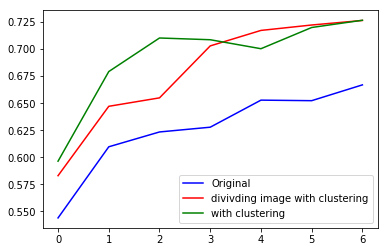

In [90]:
plt.plot(val_acc,'-b', label='Original')
plt.plot(val_acc1,'-r', label='divivding image with clustering')
plt.plot(val_acc2,'-g', label='with clustering')
plt.legend()
plt.show()